In [1]:
exec(open("../../../python/FNC_init.py").read())

[**Demo %s**](#demo-adapt-basic)

Let's run adaptive RK on  $u'=e^{t-u\sin u}$.

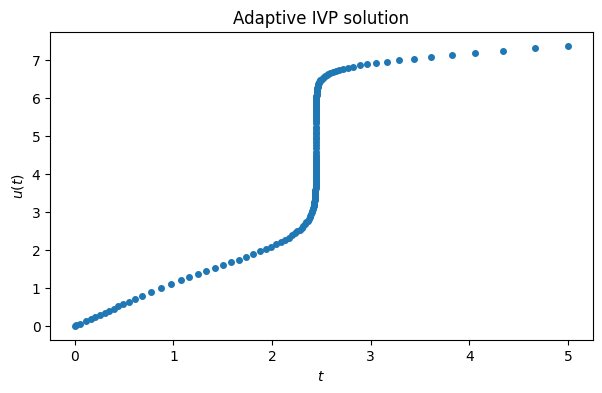

In [2]:
f = lambda t, u: exp(t - u * sin(u))
t, u = FNC.rk23(f, [0.0, 5.0], [0.0], 1e-5)
scatter(t, u[0, :])
xlabel("$t$"), ylabel("$u(t)$")
title(("Adaptive IVP solution"));

The solution makes a very abrupt change near $t=2.4$. The resulting time steps vary over three orders of magnitude.

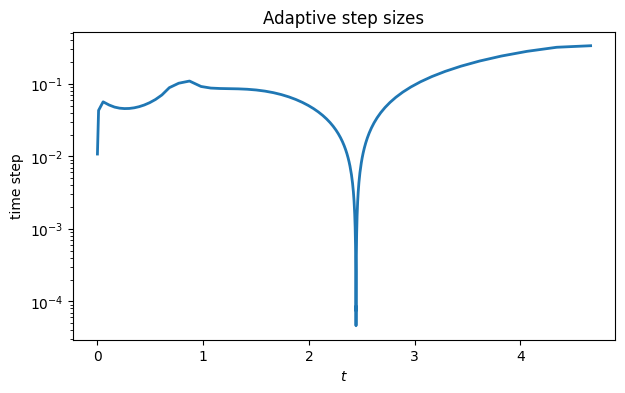

In [3]:
dt = [t[i + 1] - t[i] for i in range(t.size - 1)]
semilogy(t[:-1], dt)
xlabel("$t$"), ylabel("time step")
title(("Adaptive step sizes"));

If we had to run with a uniform step size to get this accuracy, it would be

In [4]:
print(f"min step size was {min(dt):.2e}")

min step size was 4.61e-05


On the other hand, the average step size that was actually taken was

In [5]:
print(f"mean step size was {mean(dt):.2e}")

mean step size was 3.21e-02


We took fewer steps by a factor of 1000! Even accounting for the extra stage per step and the occasional rejected step, the savings are clear.